In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [48]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [49]:
mnist = tf.keras.datasets.fashion_mnist

In [50]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

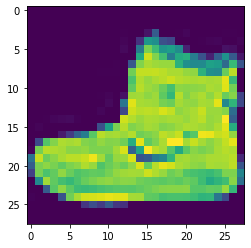

In [51]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [52]:
training_images  = training_images / 255.0
test_images = test_images / 255.0


In [53]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [55]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 2s 961us/step - loss: 0.4982 - accuracy: 0.8241
Epoch 2/5
1840/1875 [============================>.] - ETA: 0s - loss: 0.3728 - accuracy: 0.8660
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 2s 886us/step - loss: 0.3730 - accuracy: 0.8658


In [56]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 787us/step - loss: 0.4041 - accuracy: 0.8544


[0.404058039188385, 0.8543999791145325]

In [57]:
classifications = model.predict(test_images)

print(classifications[0])

[2.9524685e-05 9.8134444e-07 1.0697927e-05 1.7380810e-06 1.5571568e-05 1.5567072e-01 3.3462715e-05 6.3319780e-02 8.3467847e-04 7.8008282e-01]
